<a href="https://colab.research.google.com/github/rooj908/Hackhatone_2026_/blob/main/hackhatone_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Receipt upload karo – Apni receipt ki image computer me do.

2.Image clean karo – Black & white karo, thodi blur lagao, taake text clearly dikhe.

3.OCR se text lo – Computer ab image se words aur numbers read karke Python me convert kar dega.

4.Output – Tumhe receipt ka text milega, jaise “Milk 2 240, Bread 1 120…”

Basically: Image → Clean → Read → Text ✅

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


Saving WhatsApp Image 2026-02-15 at 10.53.34 AM.jpeg to WhatsApp Image 2026-02-15 at 10.53.34 AM (2).jpeg
Uploaded file: WhatsApp Image 2026-02-15 at 10.53.34 AM (2).jpeg


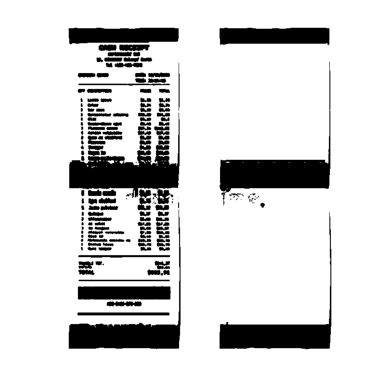

OCR Extracted Text:

 

Faas
i Ms 1 san

 



In [ ]:
# -------------------------------
# Step 0: Install Libraries
# -------------------------------
!pip install pytesseract opencv-python-headless pillow matplotlib
!apt-get install -y tesseract-ocr

# -------------------------------
# Step 1: Imports
# -------------------------------
import cv2
import pytesseract
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from google.colab import files

# -------------------------------
# Step 2: Upload Single Receipt Image
# -------------------------------
uploaded = files.upload()  # Upload your receipt image (e.g., sample_receipt.png)
img_path = list(uploaded.keys())[0]
print("Uploaded file:", img_path)

# -------------------------------
# Step 3: Preprocessing Function
# -------------------------------
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        raise FileNotFoundError(f"Cannot read image: {image_path}")
    # Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Noise reduction
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    # Thresholding (contrast)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    return thresh

processed_img = preprocess_image(img_path)

# -------------------------------
# Step 4: Show Processed Image
# -------------------------------
plt.imshow(processed_img, cmap='gray')
plt.axis('off')
plt.show()

# -------------------------------
# Step 5: OCR – Extract Text
# -------------------------------
text = pytesseract.image_to_string(processed_img)
print("OCR Extracted Text:\n")
print(text)

OCR se jo text aaya, usko clean karke har item ka name, quantity, aur price Python me list/dictionary me store karna.

Basically:
Text → Split → Numbers for quantity & price → Rest is item name → Store ✅

In [ ]:
parsed_items = []

lines = text.split("\n")

for line in lines:
    line = line.strip()
    if line == "" or "total" in line.lower():
        continue

    # Split line by spaces
    parts = line.split()

    # Find all numbers in the line
    numbers = [p for p in parts if p.replace('.', '', 1).isdigit()]

    if len(numbers) == 0:
        continue  # Skip lines with no numbers

    # Last number = price
    try:
        price = float(numbers[-1])
    except:
        price = 0.0

    # Quantity = second last number if exists
    try:
        quantity = int(numbers[-2])
    except:
        quantity = 1

    # Item name = remove numbers from line
    name_parts = [p for p in parts if not p.replace('.', '', 1).isdigit()]
    name = " ".join(name_parts)

    parsed_items.append({
        "item": name,
        "quantity": quantity,
        "price": price
    })

# Show structured items
print("Structured Items:")
for it in parsed_items:
    print(it)

Structured Items:
{'item': 'i Ms san', 'quantity': 1, 'price': 1.0}


Har item ko category assign karo – jaise Milk → Dairy, Bread → Bakery.

Har category ka total kharcha calculate karo.

Overall spending bhi calculate karo.

Basically:
Items → Categories → Category Totals → Total Spending ✅

In [ ]:
# Step 3: Categorize items and calculate spending

# Example parsed_items from Step 2
# parsed_items = [
#   {'item': 'Milk', 'quantity': 2, 'price': 240.0},
#   {'item': 'Bread', 'quantity': 1, 'price': 120.0},
#   {'item': 'Chips', 'quantity': 3, 'price': 80.0},
#   {'item': 'Cake', 'quantity': 1, 'price': 350.0}
# ]

# 1. Define simple category map
category_map = {
    "milk": "Dairy",
    "bread": "Bakery",
    "cake": "Bakery",
    "chips": "Snacks",
    "chicken": "Meat",
    "juice": "Beverages"
}

# 2. Assign category to each item
for item in parsed_items:
    name_lower = item['item'].lower()
    item['category'] = "Other"  # default
    for key in category_map:
        if key in name_lower:
            item['category'] = category_map[key]
            break

# 3. Calculate total per category
category_totals = {}
for item in parsed_items:
    cat = item['category']
    category_totals[cat] = category_totals.get(cat, 0) + item['price']

# 4. Overall spending
total_spent = sum(category_totals.values())


# -------------------------------
# Show Results
# -------------------------------
print("Items with Categories:")
for item in parsed_items:
    print(item)

print("\nCategory Totals:")
for cat, amt in category_totals.items():
    print(f"{cat}: {amt}")

print(f"\nTotal Spending: {total_spent}")

Items with Categories:
{'item': 'i Ms san', 'quantity': 1, 'price': 1.0, 'category': 'Other'}

Category Totals:
Other: 1.0

Total Spending: 1.0


Har category ka kharcha total me kitna hai dekho.

Percentage calculate karo: (category_total / total_spent) * 100

Agar percentage bohot zyada hai → alert do.

Output me tumhe percentage + warnings mil jaate hain.

Basically:
Category Totals → Percentages → Alerts ✅

In [ ]:
# Step 4: Spending Analysis

# Assume category_totals and total_spent from Step 3
# Example:
# category_totals = {'Dairy': 240.0, 'Bakery': 470.0, 'Snacks': 80.0}
# total_spent = 790.0

# 1. Calculate percentage of spending per category
category_percentages = {}
for cat, amt in category_totals.items():
    category_percentages[cat] = round((amt / total_spent) * 100, 2)

# 2. Highlight overspending
alerts = []
for cat, pct in category_percentages.items():
    if pct > 40:
        alerts.append(f"⚠️ {cat} par zyada kharch ho raha hai ({pct}%)")
    elif pct > 25:
        alerts.append(f"{cat} spending thodi zyada hai ({pct}%)")

if not alerts:
    alerts.append("👍 Spending balanced hai")

# -------------------------------
# Show Results
# -------------------------------
print("Category Percentages:")
for cat, pct in category_percentages.items():
    print(f"{cat}: {pct}%")

print("\nAlerts / Suggestions:")
for a in alerts:
    print(a)

Category Percentages:
Other: 100.0%

Alerts / Suggestions:
⚠️ Other par zyada kharch ho raha hai (100.0%)


Step 5 Explanation – Beginner Friendly

Category percentages check karo – Step 4 se mile data.

Agar koi category bohot zyada kharch ho rahi hai → alert add karo.

Extra tips add karo – weekly budget set karna, snacks kam karna, essential items pe focus.

Result me clear, human-readable advice milta hai, jaise LLM generate kare.

In [ ]:
# Step 5: Generate Financial Advice using structured data

def generate_budget_advice(parsed_items, category_percentages):
    advice = []

    # Overspending categories
    for cat, pct in category_percentages.items():
        if pct > 40:
            advice.append(f"⚠️ {cat} par zyada kharch ho raha hai ({pct}%)")
        elif pct > 25:
            advice.append(f"{cat} spending thodi zyada hai ({pct}%)")

    # General tips
    advice.append("Weekly budget set karo.")
    advice.append("Snacks aur sweets kam karo.")
    advice.append("Essential items pe focus karo.")

    return advice

# Run LLM-style advice
budget_tips = generate_budget_advice(parsed_items, category_percentages)

# Show advice
print("Personalized Budget Advice:")
for tip in budget_tips:
    print("-", tip)

Personalized Budget Advice:
- ⚠️ Other par zyada kharch ho raha hai (100.0%)
- Weekly budget set karo.
- Snacks aur sweets kam karo.
- Essential items pe focus karo.


In [63]:
st.title("Receipt Expense Analyzer & Budget Advice")

2026-02-15 09:09:18.713 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:09:18.717 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:09:18.719 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [64]:
uploaded_file = st.file_uploader("Upload your receipt image", type=["png", "jpg", "jpeg"])

2026-02-15 09:09:31.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:09:31.812 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:09:31.813 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:09:31.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:09:31.816 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:09:31.818 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [67]:
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption="Uploaded Receipt", use_column_width=True)

    # Image → grayscale, blur, threshold
    img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

    # OCR
    text = pytesseract.image_to_string(thresh)

In [68]:
advice = alerts + ["Weekly budget set karo.", "Snacks kam karo.", "Essential items pe focus karo."]

2026-02-15 09:11:41.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:11:41.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:11:41.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:11:41.155 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:11:41.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:11:41.180 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:11:41.181 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-15 09:11:41.185 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

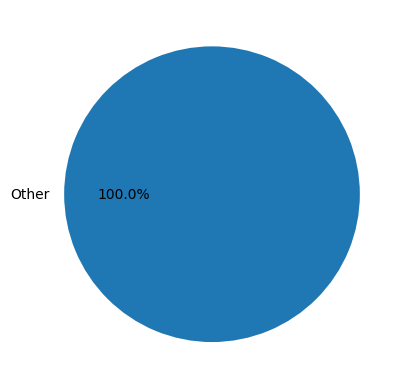

In [69]:
st.subheader("Items & Categories")
st.table(parsed_items)

st.subheader("Category Totals")
st.table(category_totals)

st.subheader("Category Percentages")
st.table(category_percentages)

st.subheader("Budget Advice")
for tip in advice:
    st.write("-", tip)

# Pie chart
fig, ax = plt.subplots()
ax.pie(category_totals.values(), labels=category_totals.keys(), autopct='%1.1f%%')
st.pyplot(fig)

In [70]:
!pip install streamlit
!pip install pyngrok
!pip install pytesseract
!pip install pillow

In [72]:
!sudo apt-get install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [73]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

In [74]:
%%writefile app.py
import streamlit as st
from PIL import Image
import pytesseract

st.title("Receipt OCR App")

uploaded_file = st.file_uploader("Upload an image", type=["png","jpg","jpeg"])
if uploaded_file is not None:
    image = Image.open(uploaded_file)
    text = pytesseract.image_to_string(image)
    st.text("Extracted Text:")
    st.text(text)

Overwriting app.py


In [76]:
!streamlit run app.py & npx localtunnel --port 8501

⠙⠹

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) 
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.26.212.80:8502

  Stopping...
^C


In [77]:
# Install required packages if not already installed
# pip install pytesseract pillow pandas openai

import pytesseract
from PIL import Image
import pandas as pd

# Optional: configure path to tesseract executable
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# 1. OCR Extraction
def extract_text_from_receipt(image_path):
    img = Image.open(image_path)
    text = pytesseract.image_to_string(img)
    return text

# 2. Parse Receipt Text (basic example)
def parse_receipt(text):
    """
    Simple parser assuming each line has: item_name price
    Adjust regex or parsing rules for your receipts
    """
    data = []
    for line in text.split("\n"):
        parts = line.strip().split()
        if len(parts) >= 2:
            try:
                price = float(parts[-1].replace('$',''))
                item_name = " ".join(parts[:-1])
                data.append({"Item": item_name, "Price": price})
            except ValueError:
                continue
    df = pd.DataFrame(data)
    if not df.empty:
        df['Total'] = df['Price'].sum()
    return df

# 3. LLM Advice (placeholder)
def llm_advice(df):
    if df.empty:
        return "No items detected."

    total = df['Total'].iloc[0]
    advice = f"Your total spending is ${total:.2f}."
    # Example: simple advice based on total
    if total > 100:
        advice += " Consider reducing unnecessary purchases."
    else:
        advice += " Good job keeping expenses low."
    return advice

# Demo workflow
if __name__ == "__main__":
    receipt_image = img_path  # Use the uploaded image path
    text = extract_text_from_receipt(receipt_image)
    print("=== OCR Output ===")
    print(text)

    df = parse_receipt(text)
    print("\n=== Parsed Data ===")
    print(df)

    advice = llm_advice(df)
    print("\n=== LLM Advice ===")
    print(advice)

=== OCR Output ===
CASH RECEIPT
12, wloevm Galan fares
Tet HEa-4567050

 

   

 

  

cone nee on
sae

oer

imam ue

= oe

ee: £3

2 eur os

2 how Bie

2D emt gst

1 Etian dibenoun 805

6 Mauris mauris $55

etal Ws

2 Seine

i See i

a Ee

; ae

 

 

 

Tora ss0b 31
UDINE 0

 

8-155 €F6-25

 

*THANK YOU*


=== Parsed Data ===
               Item  Price  Total
0  1 Etian dibenoun  805.0  891.0
1   6 Mauris mauris   55.0  891.0
2         Tora ss0b   31.0  891.0
3             UDINE    0.0  891.0

=== LLM Advice ===
Your total spending is $891.00. Consider reducing unnecessary purchases.


In [78]:
# The 'receipts' list contains hardcoded filenames that do not exist.
# Instead, we will process the single image that was uploaded earlier (stored in 'img_path').

print(f"\n--- Processing {img_path} ---")
text = extract_text_from_receipt(img_path)
df = parse_receipt(text)
advice = llm_advice(df)
print(df)
print(advice)


--- Processing WhatsApp Image 2026-02-15 at 10.53.34 AM (2).jpeg ---
               Item  Price  Total
0  1 Etian dibenoun  805.0  891.0
1   6 Mauris mauris   55.0  891.0
2         Tora ss0b   31.0  891.0
3             UDINE    0.0  891.0
Your total spending is $891.00. Consider reducing unnecessary purchases.
